In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error , accuracy_score,confusion_matrix, classification_report

In [183]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("merged_with_missing_values_2removed.csv",na_values='-')

Saving merged_with_missing_values_2removed.csv to merged_with_missing_values_2removed (6).csv


In [184]:
df["\nBenign_malignant_cancer"].value_counts()

1    695
0    436
Name: \nBenign_malignant_cancer, dtype: int64

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1131 entries, 0 to 1130
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          1131 non-null   int64  
 1   hereditary_history              1131 non-null   int64  
 2   age                             1131 non-null   int64  
 3   weight                          1131 non-null   int64  
 4   marital_status                  1131 non-null   int64  
 5   marital_length                  1052 non-null   float64
 6   pregnency_experience            1052 non-null   float64
 7   giving_birth                    1052 non-null   float64
 8   age_FirstGivingBirth            1052 non-null   float64
 9   
abortion                       1052 non-null   float64
 10  blood                           1131 non-null   int64  
 11  taking_blood_pressure_medicine  1131 non-null   int64  
 12  smoking                         11

In [186]:
df = df.drop(columns=["condition"],axis = 1)

In [187]:
df = df.dropna()

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1050 entries, 0 to 1051
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          1050 non-null   int64  
 1   hereditary_history              1050 non-null   int64  
 2   age                             1050 non-null   int64  
 3   weight                          1050 non-null   int64  
 4   marital_status                  1050 non-null   int64  
 5   marital_length                  1050 non-null   float64
 6   pregnency_experience            1050 non-null   float64
 7   giving_birth                    1050 non-null   float64
 8   age_FirstGivingBirth            1050 non-null   float64
 9   
abortion                       1050 non-null   float64
 10  blood                           1050 non-null   int64  
 11  taking_blood_pressure_medicine  1050 non-null   int64  
 12  smoking                         10

In [189]:
df.head()

,gender,hereditary_history,age,weight,marital_status,marital_length,pregnency_experience,giving_birth,age_FirstGivingBirth,\nabortion,blood,taking_blood_pressure_medicine,smoking,alcohol,breast_pain,Birth_control(Contraception),\nmenstrual_age,\nmenopausal_age,\nBenign_malignant_cancer
0,0,1,30,69,1,0.0,0.0,0.0,0.0,0.0,4,1,0,0,1,1,1,0.0,1
1,0,0,30,71,0,0.0,0.0,0.0,0.0,0.0,1,1,0,1,0,0,2,0.0,0
2,0,0,30,74,1,0.0,0.0,0.0,0.0,1.0,4,1,0,0,1,0,1,0.0,1
3,0,1,30,75,1,1.0,1.0,3.0,1.0,0.0,2,1,1,0,0,0,2,0.0,0
4,0,0,10,70,0,0.0,0.0,0.0,0.0,0.0,7,0,0,0,0,0,0,0.0,0


In [190]:
cat_cols = df[[ 'marital_length', 'pregnency_experience', 'giving_birth',
       'age_FirstGivingBirth  ', '\nabortion', ]]

In [191]:
numerical_cols = df[['gender ', 'hereditary_history', 'age',
       'weight', 'marital_status', 'blood',
        'taking_blood_pressure_medicine',
        'smoking', 'alcohol',
       'breast_pain', 'Birth_control(Contraception)',
       '\nmenstrual_age', '\nmenopausal_age', '\nBenign_malignant_cancer']]

In [192]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)
train = df.drop((missing_data[missing_data['Total'] > 81]).index,1)

In [193]:
df['\nmenopausal_age'] = df['\nmenopausal_age'].fillna(df['\nmenopausal_age'].median())

In [194]:
pd.get_dummies(df)

,gender,hereditary_history,age,weight,marital_status,marital_length,pregnency_experience,giving_birth,age_FirstGivingBirth,\nabortion,blood,taking_blood_pressure_medicine,smoking,alcohol,breast_pain,Birth_control(Contraception),\nmenstrual_age,\nmenopausal_age,\nBenign_malignant_cancer
0,0,1,30,69,1,0.0,0.0,0.0,0.0,0.0,4,1,0,0,1,1,1,0.0,1
1,0,0,30,71,0,0.0,0.0,0.0,0.0,0.0,1,1,0,1,0,0,2,0.0,0
2,0,0,30,74,1,0.0,0.0,0.0,0.0,1.0,4,1,0,0,1,0,1,0.0,1
3,0,1,30,75,1,1.0,1.0,3.0,1.0,0.0,2,1,1,0,0,0,2,0.0,0
4,0,0,10,70,0,0.0,0.0,0.0,0.0,0.0,7,0,0,0,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,0,1,21,65,1,0.0,1.0,3.0,0.0,0.0,0,1,0,0,1,1,2,0.0,0
1048,0,1,71,45,1,1.0,1.0,3.0,0.0,0.0,3,1,0,1,0,1,1,1.0,1
1049,0,0,48,15,0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,1,1,0.0,0
1050,0,1,61,75,1,1.0,1.0,1.0,1.0,1.0,1,1,1,1,0,1,2,2.0,1


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1050 entries, 0 to 1051
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          1050 non-null   int64  
 1   hereditary_history              1050 non-null   int64  
 2   age                             1050 non-null   int64  
 3   weight                          1050 non-null   int64  
 4   marital_status                  1050 non-null   int64  
 5   marital_length                  1050 non-null   float64
 6   pregnency_experience            1050 non-null   float64
 7   giving_birth                    1050 non-null   float64
 8   age_FirstGivingBirth            1050 non-null   float64
 9   
abortion                       1050 non-null   float64
 10  blood                           1050 non-null   int64  
 11  taking_blood_pressure_medicine  1050 non-null   int64  
 12  smoking                         10

In [196]:
y = df['\nBenign_malignant_cancer']
X = df.drop('\nBenign_malignant_cancer', axis=1)

In [197]:
print(f"'X' shape: {X.shape}")
print(f"'y' shape: {y.shape}")

# pipeline = Pipeline([
#     ('min_max_scaler', MinMaxScaler()),
#     ('std_scaler', StandardScaler())
# ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

'X' shape: (1050, 18)
'y' shape: (1050,)


In [198]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(mean_squared_error(y_train ,pred))
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(mean_squared_error(y_test ,pred))        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [199]:
model = LogisticRegression()
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
0.35714285714285715
Accuracy Score: 64.29%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.601770    0.651838  0.642857    0.626804      0.632128
recall       0.274194    0.882199  0.642857    0.578196      0.642857
f1-score     0.376731    0.749722  0.642857    0.563227      0.602894
support    248.000000  382.000000  0.642857  630.000000    630.000000
_______________________________________________
Confusion Matrix: 
 [[ 68 180]
 [ 45 337]]

Test Result:
0.34285714285714286
Accuracy Score: 65.71%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.561404    0.672176  0.657143    0.616790      0.632351
recall       0.211921    0.907063  0.657143    0.559492      0.657143
f1-score     0.307692    0.772152  0.657143    0.539922      0.605168
support    151.000000  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [200]:
model = DecisionTreeClassifier(ccp_alpha=0.002, random_state=0)
model.fit(X_train, y_train).tree_.node_count
  
print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)


Train Result:
0.07142857142857142
Accuracy Score: 92.86%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.943231    0.920200  0.928571    0.931715      0.929266
recall       0.870968    0.965969  0.928571    0.918468      0.928571
f1-score     0.905660    0.942529  0.928571    0.924095      0.928015
support    248.000000  382.000000  0.928571  630.000000    630.000000
_______________________________________________
Confusion Matrix: 
 [[216  32]
 [ 13 369]]

Test Result:
0.430952380952381
Accuracy Score: 56.90%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.392857    0.657143  0.569048    0.525000      0.562126
recall       0.364238    0.684015  0.569048    0.524127      0.569048
f1-score     0.378007    0.670310  0.569048    0.524158      0.565220
support    151.000000  26

In [201]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
0.0
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    248.0  382.0       1.0      630.0         630.0
_______________________________________________
Confusion Matrix: 
 [[248   0]
 [  0 382]]

Test Result:
0.3952380952380952
Accuracy Score: 60.48%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.409639    0.652819  0.604762    0.531229      0.565390
recall       0.225166    0.817844  0.604762    0.521505      0.604762
f1-score     0.290598    0.726073  0.604762    0.508335      0.569509
support    151.000000  269.000000  0.604762  420.000000    420.000000
________________________

In [202]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
0.3126984126984127
Accuracy Score: 68.73%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.628141    0.714617  0.687302    0.671379      0.680576
recall       0.504032    0.806283  0.687302    0.655157      0.687302
f1-score     0.559284    0.757688  0.687302    0.658486      0.679586
support    248.000000  382.000000  0.687302  630.000000    630.000000
_______________________________________________
Confusion Matrix: 
 [[125 123]
 [ 74 308]]

Test Result:
0.38333333333333336
Accuracy Score: 61.67%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.460317    0.683673  0.616667    0.571995      0.603372
recall       0.384106    0.747212  0.616667    0.565659      0.616667
f1-score     0.418773    0.714032  0.616667    0.566402      0.607879
support    151.000000  2

In [203]:
model = SVC()
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
0.39365079365079364
Accuracy Score: 60.63%
_______________________________________________
CLASSIFICATION REPORT:
               0           1  accuracy   macro avg  weighted avg
precision    0.0    0.606349  0.606349    0.303175      0.367659
recall       0.0    1.000000  0.606349    0.500000      0.606349
f1-score     0.0    0.754941  0.606349    0.377470      0.457758
support    248.0  382.000000  0.606349  630.000000    630.000000
_______________________________________________
Confusion Matrix: 
 [[  0 248]
 [  0 382]]

Test Result:
0.3595238095238095
Accuracy Score: 64.05%
_______________________________________________
CLASSIFICATION REPORT:
               0           1  accuracy   macro avg  weighted avg
precision    0.0    0.640476  0.640476    0.320238      0.410210
recall       0.0    1.000000  0.640476    0.500000      0.640476
f1-score     0.0    0.780842  0.640476    0.390421      0.500111
support    151.0  269.000000  0.640476  420.000000    420.000000
____

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [204]:
model = GaussianNB()
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
0.4111111111111111
Accuracy Score: 58.89%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.475556    0.651852  0.588889    0.563704      0.582453
recall       0.431452    0.691099  0.588889    0.561276      0.588889
f1-score     0.452431    0.670902  0.588889    0.561667      0.584901
support    248.000000  382.000000  0.588889  630.000000    630.000000
_______________________________________________
Confusion Matrix: 
 [[107 141]
 [118 264]]

Test Result:
0.4166666666666667
Accuracy Score: 58.33%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.411765    0.665493  0.583333    0.538629      0.574272
recall       0.370861    0.702602  0.583333    0.536732      0.583333
f1-score     0.390244    0.683544  0.583333    0.536894      0.578096
support    151.000000  26

In [205]:
input_data = (0,0,1,15,0,0,0,0,0,1,2,1,0,0,1,0,0,0)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)


[1]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


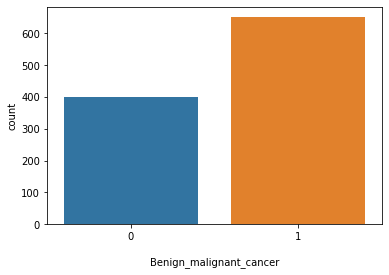

In [206]:
sns.countplot(df['\nBenign_malignant_cancer'], label = "Count")

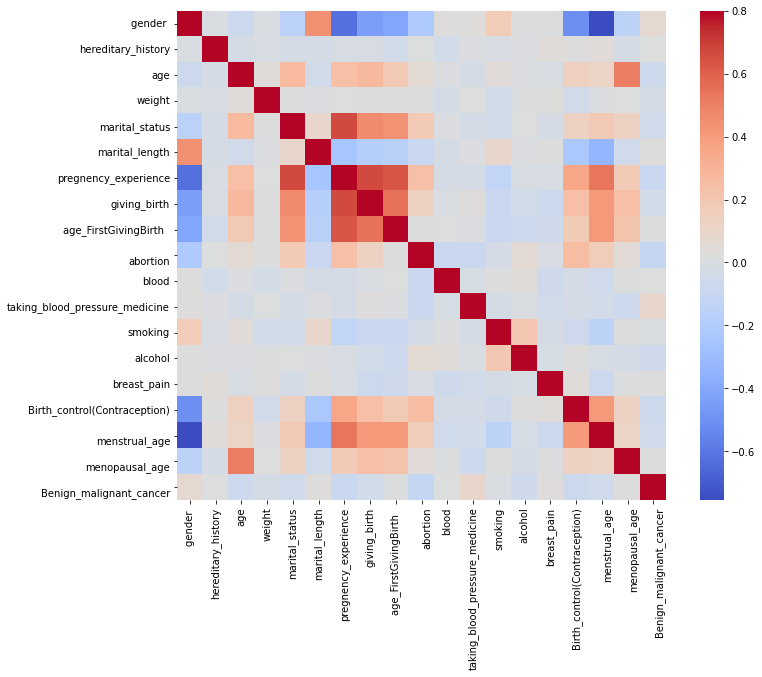

In [207]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, cmap="coolwarm", vmax=.8, square=True);

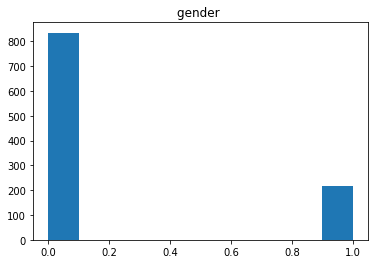

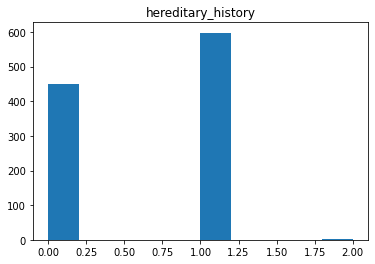

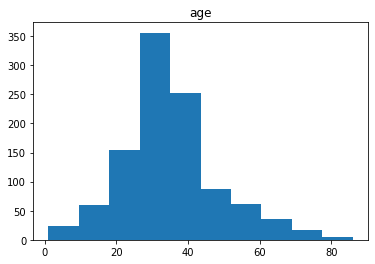

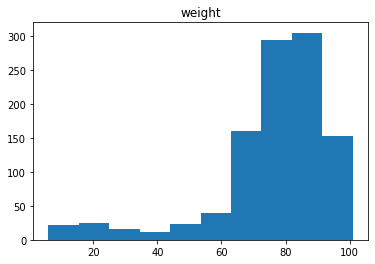

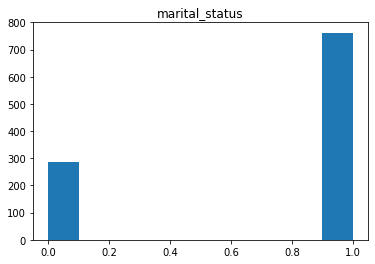

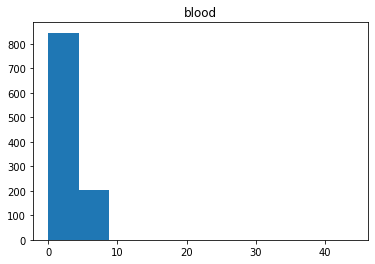

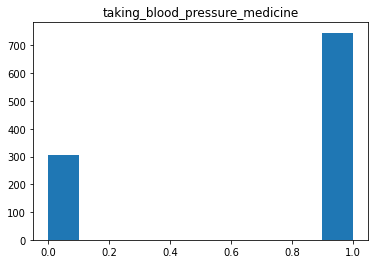

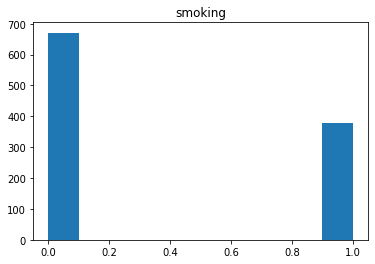

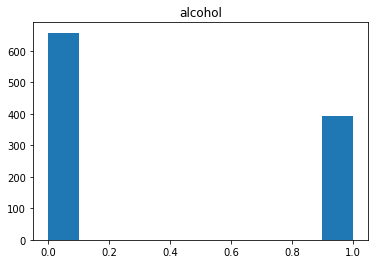

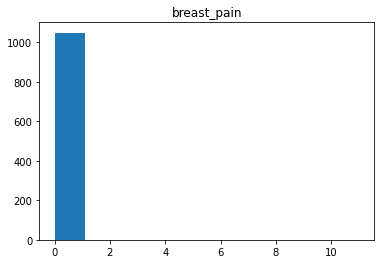

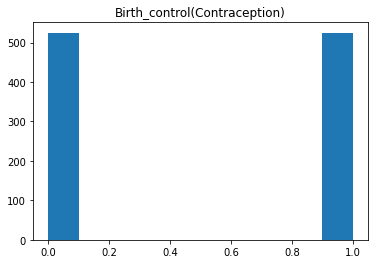

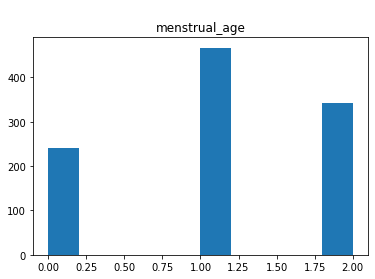

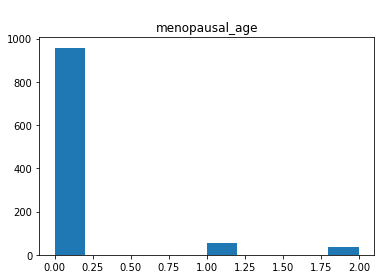

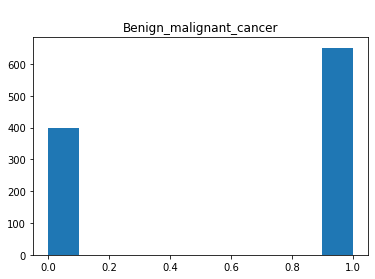

In [208]:
for i in numerical_cols.columns:
    plt.hist(numerical_cols[i])
    plt.title(i)
    plt.show()

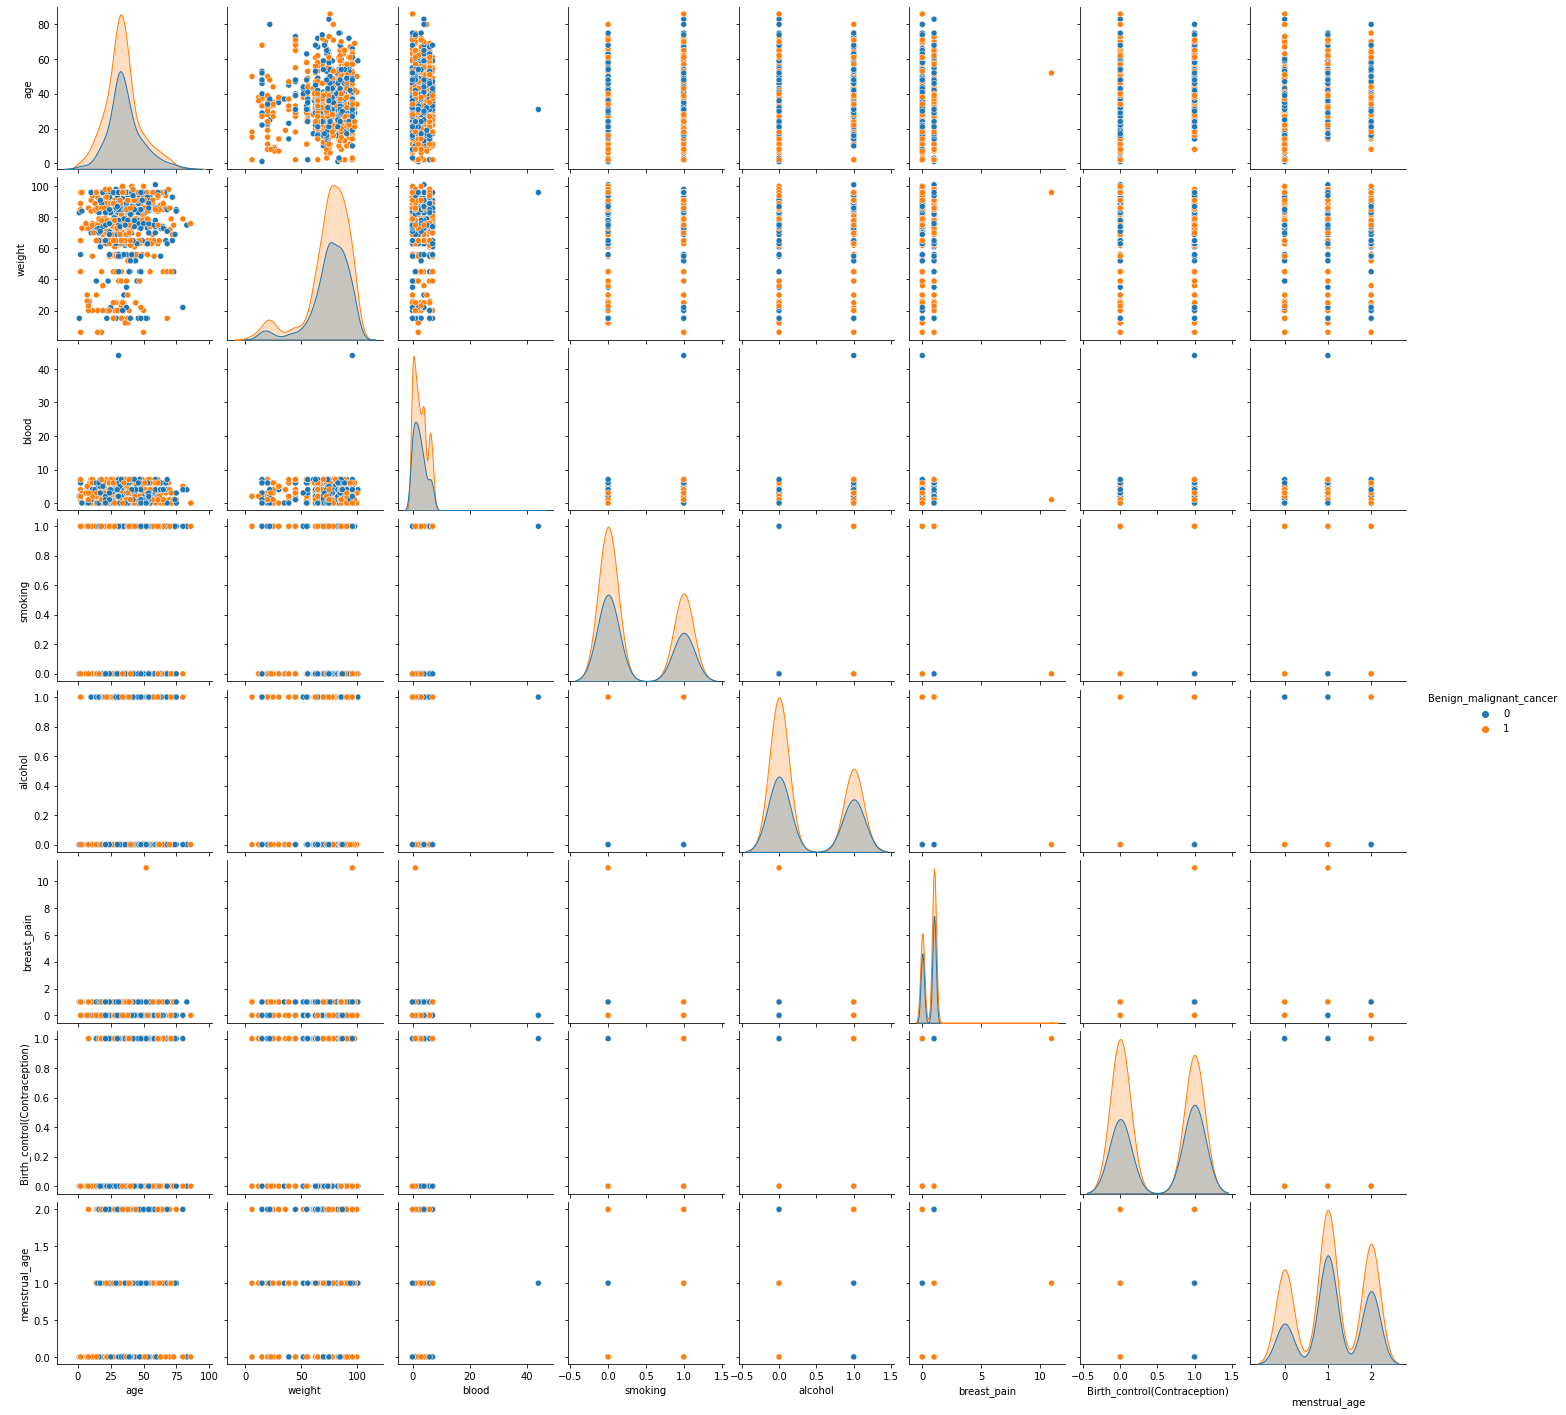

In [209]:
sns.pairplot(df, hue='\nBenign_malignant_cancer', vars=['age','weight', 'blood',
                                                        'smoking', 'alcohol','breast_pain', 'Birth_control(Contraception)',
                                                        '\nmenstrual_age'])
plt.show()

In [210]:
df["\nBenign_malignant_cancer"].value_counts()

1    651
0    399
Name: \nBenign_malignant_cancer, dtype: int64

In [211]:
 Look at index 4 and 6, which demonstrate overlapping cases.
x1 = [100,61,69,61]
y1 = [4, 7, 2, 4, 7, 8, 3]

x2 = [2, 4, 6, 8, 10]
y2 = [5, 6, 2, 6, 2]

# Colors: https://matplotlib.org/api/colors_api.html

plt.bar(x1, y1, label="Blue Bar", color='b')
plt.bar(x2, y2, label="Green Bar", color='g')
plt.plot()

plt.xlabel("bar number")
plt.ylabel("bar height")
plt.title("Bar Chart Example")
plt.legend()
plt.show()

SyntaxError: ignored